In [1]:
 pip install --upgrade jupyterlab-git

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\slrob\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
data_file = pd.read_csv(path+"/StudentsPerformance.csv")
data_file

,gender,student number,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,1,group B,bachelor's degree,standard,none,72,72,74
1,female,2,group C,some college,standard,completed,69,90,88
2,female,3,group B,master's degree,standard,none,90,95,93
3,male,4,group A,associate's degree,free/reduced,none,47,57,44
4,male,5,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,996,group E,master's degree,standard,completed,88,99,95
996,male,997,group C,high school,free/reduced,none,62,55,55
997,female,998,group C,high school,free/reduced,completed,59,71,65
998,female,999,group D,some college,standard,completed,68,78,77


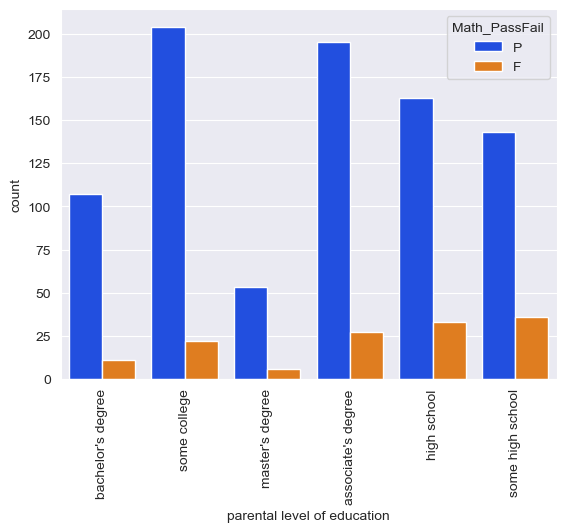

In [4]:
passmark=50
data_file["Math_PassFail"]=np.where(data_file["math score"]<passmark,"F","P")
#We call this column we add "take the math score" for us.
#Let values be False and Positive if greater.
data_file.Math_PassFail.value_counts()

#plot of success in math relative to their parents' education
p=sns.countplot(x="parental level of education",hue="Math_PassFail",data=data_file,palette="bright")
plt.xticks(rotation=90)
plt.show()

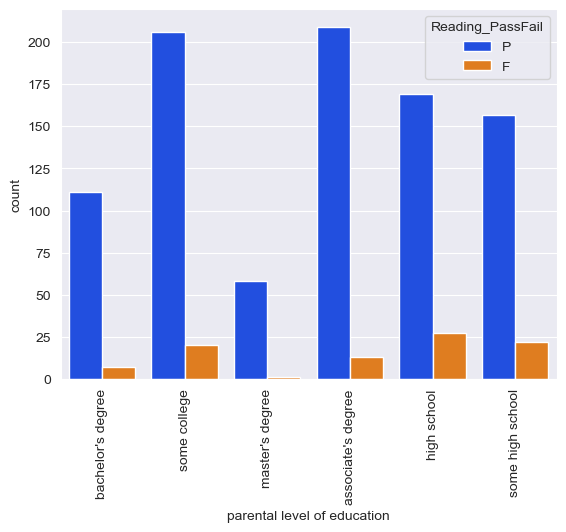

In [5]:
data_file["Reading_PassFail"]=np.where(data_file["reading score"]<passmark,"F","P")
#We call this column we add "take the math score" for us.
#Let values be False and Positive if greater.
data_file.Reading_PassFail.value_counts()

#plot of success in reading relative to their parents' education
p=sns.countplot(x="parental level of education",hue="Reading_PassFail",data=data_file,palette="bright")
plt.xticks(rotation=90)
plt.show()

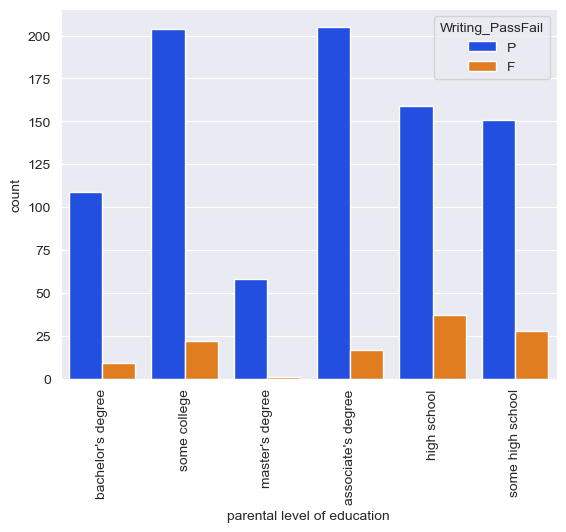

In [6]:
data_file["Writing_PassFail"]=np.where(data_file["writing score"]<passmark,"F","P")
#We call this column we add "take the math score" for us.
#Let values be False and Positive if greater.
data_file.Writing_PassFail.value_counts()

#plot of success in writing relative to their parents' education
p=sns.countplot(x="parental level of education",hue="Writing_PassFail",data=data_file,palette="bright")
plt.xticks(rotation=90)
plt.show()

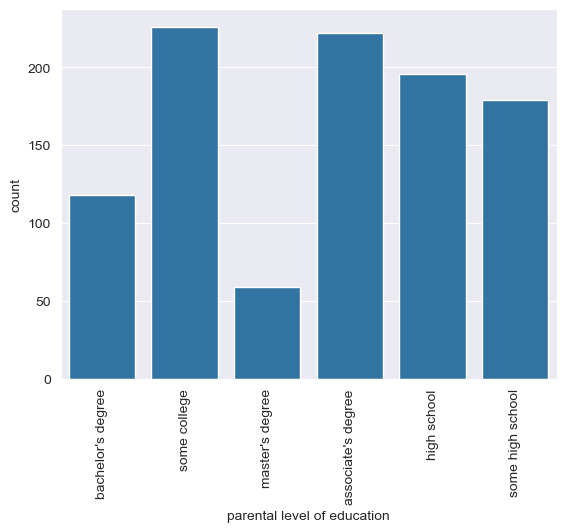

In [7]:
p=sns.countplot(x="parental level of education",data=data_file)
plt.xticks(rotation=90)
plt.show()

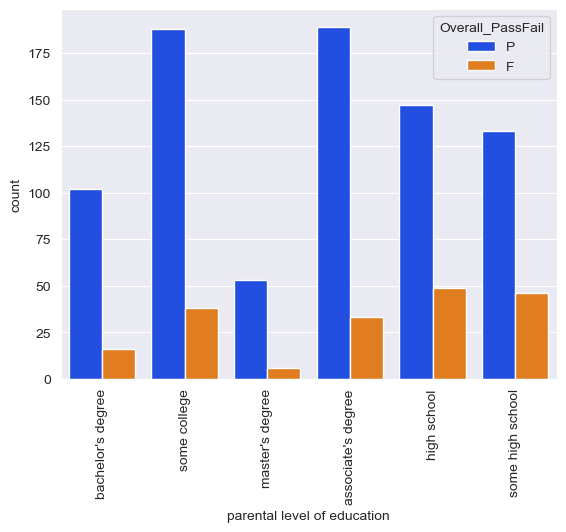

In [8]:
data_file["Overall_PassFail"] = data_file.apply(lambda x: "F" if x["Math_PassFail"]== 'F' 
                                     or x["Reading_PassFail"]== 'F' or x["Writing_PassFail"]== 'F'
                                    else 'P' , axis =1)
p=sns.countplot(x="parental level of education",hue="Overall_PassFail",data=data_file,palette="bright") 
# we compare it to hue
plt.xticks(rotation=90)
plt.show()

In [9]:
data_file.Overall_PassFail.value_counts()

Overall_PassFail
P    812
F    188
Name: count, dtype: int64